<a href="https://colab.research.google.com/github/aniruddhajd/Machine-learning/blob/master/Human_activity_recognition_using_classical_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# HumanActivityRecognition

<br>


This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# New Section

In [45]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline 
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

import warnings
warnings.filterwarnings("ignore")


In [4]:
#reading files
train=pd.read_csv('/content/drive/My Drive/datascience/projects/HAR/UCI_HAR_Dataset/csv_files/train.csv')
test=pd.read_csv('/content/drive/My Drive/datascience/projects/HAR/UCI_HAR_Dataset/csv_files/test.csv')



In [ ]:
train.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,-0.57

In [ ]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

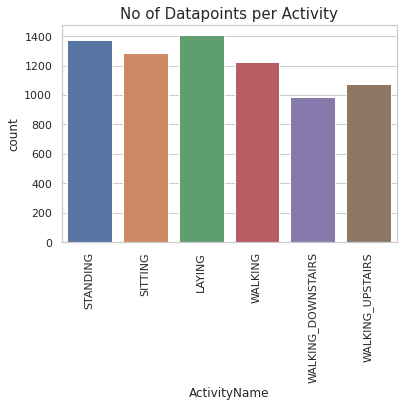

In [ ]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


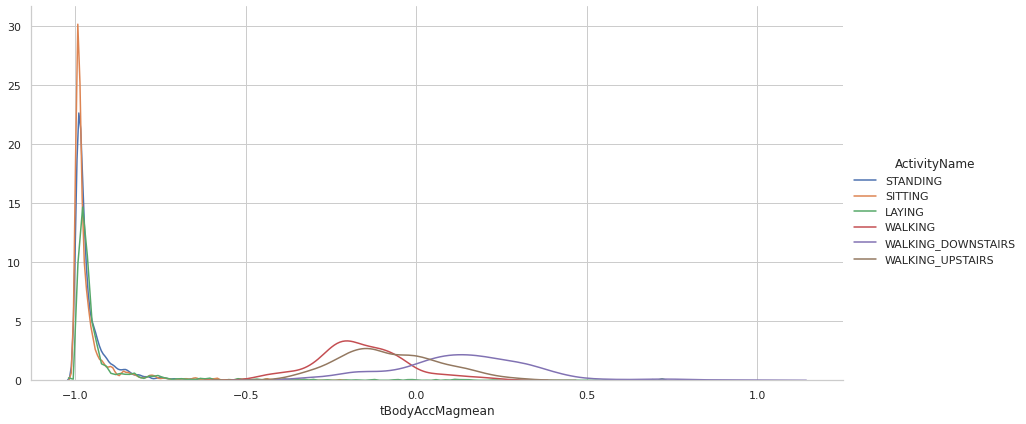

In [ ]:
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()

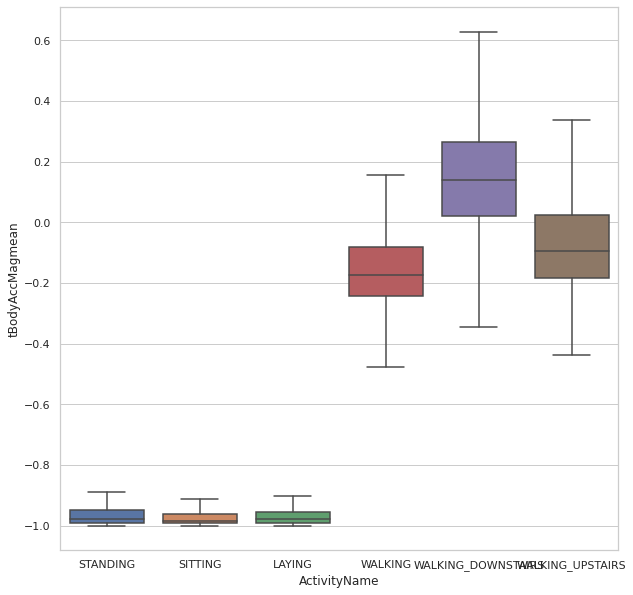

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="ActivityName", y="tBodyAccMagmean", data=train,showfliers=False)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.



In [ ]:
#apply tsne on data
from sklearn.manifold import TSNE


In [ ]:
X_for_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
model=TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 1000)
tsne_data = model.fit_transform(X_for_tsne)

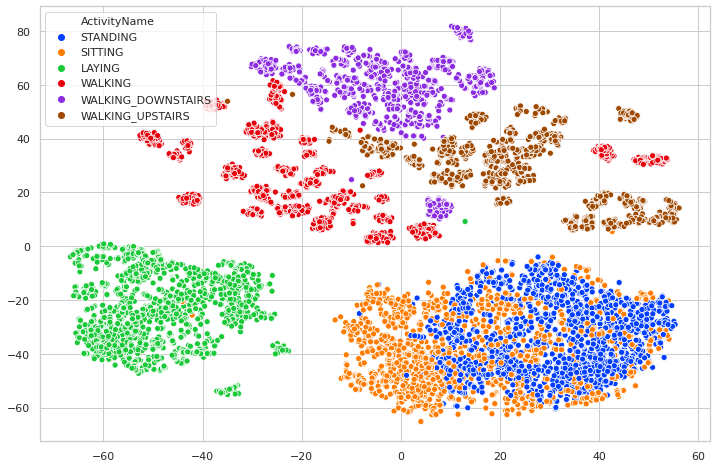

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne_data[:, 0], y = tsne_data[:, 1], hue = train["ActivityName"],palette="bright")

- Here we can see sitting and walking_downstairs are significantly overalp ane we have to seprate them 

In [39]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [22]:
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [7]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName
# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))


X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [8]:
results=dict()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':np.arange(10,70,10), 'penalty':['l2','l1']}
lr_clf = LogisticRegression()
lr_clf_rs = RandomizedSearchCV(lr_clf, param_distributions=parameters, cv=5,random_state = 42,)
lr_clf_rs.fit(X_train, y_train)
y_pred = lr_clf_rs.predict(X_test)

---------------------
|      Accuracy      |
---------------------

    0.9596199524940617


---------------------
|     classification_report     |
---------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.97      0.97       420
  WALKING_UPSTAIRS       0.97      0.94      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



<IPython.core.display.Javascript object>

---------------------
|     best_randomsearch_results     |
---------------------
Best estimator :  LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best set of parameters :  {'penalty': 'l2', 'C': 50}
Best score :  0.9333575660039678


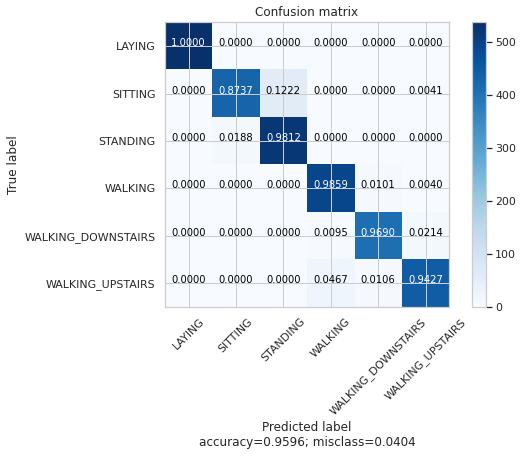

In [ ]:
#  accuracty of the model
accuracy_lr_clf = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
results['accuracy'] = accuracy_lr_clf
print('---------------------')
print('|      Accuracy      |')
print('---------------------')
print('\n    {}\n\n'.format(accuracy))
classification_report = metrics.classification_report(y_test, y_pred)
print('---------------------')
print('|     classification_report     |')
print('---------------------')
print(classification_report)
#confusion matrix
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))
#best attributes
print('---------------------')
print('|     best_randomsearch_results     |')
print('---------------------')
get_best_randomsearch_results(lr_clf_rs)

### SVM

In [ ]:
from sklearn.svm import LinearSVC
parameters = {'C':np.arange(10,70,10)}
SVM_clf = LinearSVC(tol=0.00005)
SVM_clf_rs = RandomizedSearchCV(SVM_clf, param_distributions=parameters,random_state = 42)
SVM_clf_rs.fit(X_train, y_train)
y_pred = SVM_clf_rs.predict(X_test)

---------------------
|      Accuracy      |
---------------------

    0.9670851713607058


---------------------
|     classification_report     |
---------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.97      1.00      0.99       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



<IPython.core.display.Javascript object>

---------------------
|     best_randomsearch_results     |
---------------------
Best estimator :  LinearSVC(C=40, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)
Best set of parameters :  {'C': 40}
Best score :  0.9382557101698599


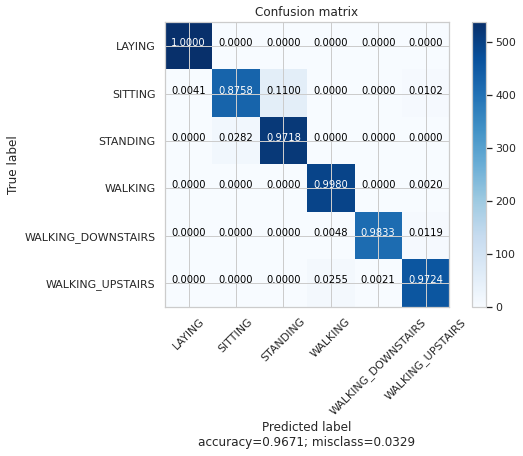

In [ ]:
#  accuracty of the model
accuracy_SVM_clf = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
results['accuracy'] = accuracy_SVM_clf
print('---------------------')
print('|      Accuracy      |')
print('---------------------')
print('\n    {}\n\n'.format(accuracy_SVM_clf))
classification_report1 = metrics.classification_report(y_test, y_pred)
print('---------------------')
print('|     classification_report     |')
print('---------------------')
print(classification_report1)
#confusion matrix
cm1 = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm1, np.unique(y_pred))
#best attributes
print('---------------------')
print('|     best_randomsearch_results     |')
print('---------------------')
get_best_randomsearch_results(SVM_clf_rs)

## Kernel SVM model with Hyperparameter tuning and cross validation

In [36]:
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

In [31]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
KSVM_clf = SVC(kernel='rbf')
KSVM_clf_rs = RandomizedSearchCV(KSVM_clf, param_distributions=parameters,n_jobs=-1)
KSVM_clf_rs.fit(X_train, y_train)
y_pred = KSVM_clf_rs.predict(X_test)


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


------------------------------
|     classification_report     |
------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



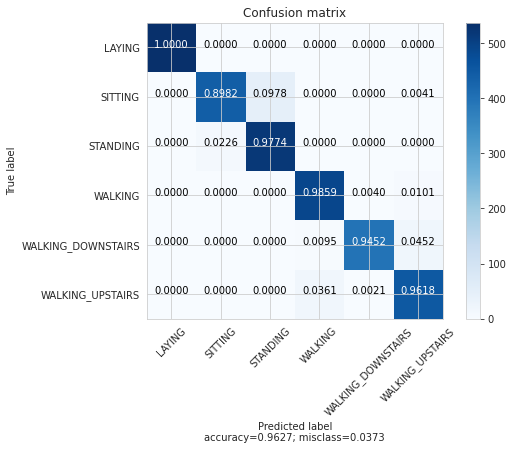

--------------------------------
|     best_randomsearch_results     |
--------------------------------
Best estimator :  SVC(C=16, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best set of parameters :  {'gamma': 0.0078125, 'C': 16}
Best score :  0.9447834551903698


In [46]:
#  accuracty of the model
accuracy_KSVM_clf = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
results['accuracy'] = accuracy_KSVM_clf
print('---------------------')
print('|      Accuracy      |')
print('---------------------')
print('\n    {}\n\n'.format(accuracy_KSVM_clf))
classification_report2 = metrics.classification_report(y_test, y_pred)
print(  '------------------------------')
print('|     classification_report     |')
print(  '------------------------------')
print(classification_report2)
#confusion matrix
cm2 = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm2, np.unique(y_pred))
#best attributes
print(   '--------------------------------')
print('|     best_randomsearch_results     |')
print(   '--------------------------------')
get_best_randomsearch_results(KSVM_clf_rs)

In [42]:
cm2 = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm2,y_pred)

<IPython.core.display.Javascript object>

##Decision tree model

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
parameters = {'max_depth':np.arange(2,10,2)}
dt_clf = DecisionTreeClassifier()
dt_clf_rs = RandomizedSearchCV(dt_clf,param_distributions=parameters,random_state = 42)
dt_clf_rs.fit(X_train, y_train)
y_pred = dt_clf_rs.predict(X_test)

In [16]:
from sklearn. linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


------------------------------
|     classification_report     |
------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



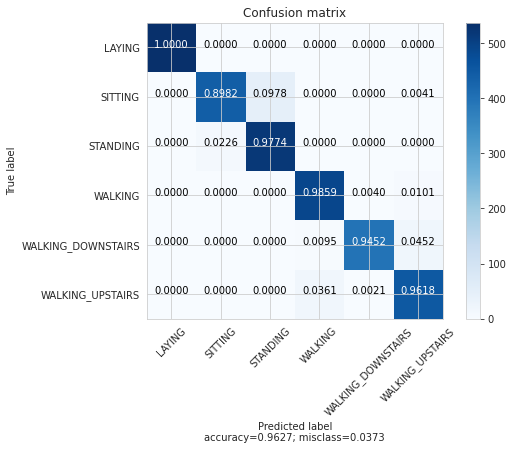

--------------------------------
|     best_randomsearch_results     |
--------------------------------
Best estimator :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best set of parameters :  {'max_depth': 8}
Best score :  0.8529733579359684


In [47]:
#  accuracty of the model
accuracy_dt_clf = accuracy_score(y_true=y_test, y_pred=y_pred)
results['accuracy'] = accuracy_dt_clf
print('---------------------')
print('|      Accuracy      |')
print('---------------------')
print('\n    {}\n\n'.format(accuracy_dt_clf))
classification_report3 = classification_report(y_test, y_pred)
print(  '------------------------------')
print('|     classification_report     |')
print(  '------------------------------')
print(classification_report3)
#confusion matrix
cm= confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))
#best attributes
print(   '--------------------------------')
print('|     best_randomsearch_results     |')
print(   '--------------------------------')
get_best_randomsearch_results(dt_clf_rs)

###Random forrest

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [57]:
rf_clf=RandomForestClassifier(random_state=42)
param_grid = { 'n_estimators': np.arange(10, 100,10), 'max_depth' : np.arange(2, 10,1)}
rf_clf_rs = RandomizedSearchCV(rf_clf, param_distributions=param_grid,n_jobs=-1)
rf_clf_rs.fit(X_train, y_train)
y_pred = rf_clf_rs.predict(X_test)



---------------------
|      Accuracy      |
---------------------

    0.9168646080760094


------------------------------
|     classification_report     |
------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.87      0.89       491
          STANDING       0.89      0.93      0.91       532
           WALKING       0.87      0.97      0.91       496
WALKING_DOWNSTAIRS       0.96      0.82      0.89       420
  WALKING_UPSTAIRS       0.88      0.89      0.88       471

          accuracy                           0.92      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.92      0.92      2947



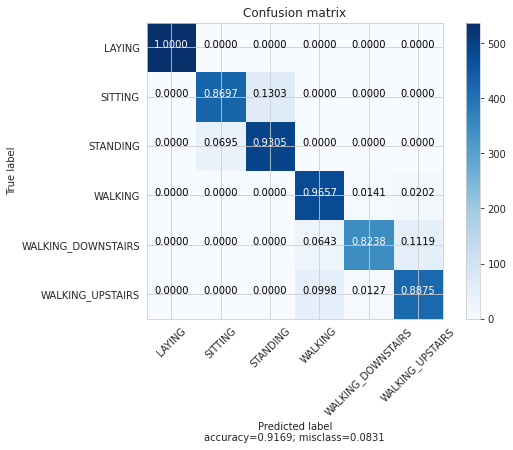

--------------------------------
|     best_randomsearch_results     |
--------------------------------
Best estimator :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Best set of parameters :  {'n_estimators': 90, 'max_depth': 8}
Best score :  0.9232900937397392


In [58]:
#  accuracty of the model
accuracy_rf_clf = accuracy_score(y_true=y_test, y_pred=y_pred)
results['accuracy'] = accuracy_rf_clf
print('---------------------')
print('|      Accuracy      |')
print('---------------------')
print('\n    {}\n\n'.format(accuracy_rf_clf))
classification_report4 = classification_report(y_test, y_pred)
print(  '------------------------------')
print('|     classification_report     |')
print(  '------------------------------')
print(classification_report4)
#confusion matrix
cm4= confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm4, np.unique(y_pred))
#best attributes
print(   '--------------------------------')
print('|     best_randomsearch_results     |')
print(   '--------------------------------')
get_best_randomsearch_results(rf_clf_rs)

##GBDT

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf=GradientBoostingClassifier()
param_grid = {'max_depth': np.arange(5,8), \
             'n_estimators':np.arange(130,170,10)}
gb_clf_rs = RandomizedSearchCV(gb_clf, param_distributions=param_grid,n_jobs=-1)
gb_clf_rs.fit(X_train, y_train)
y_pred = gb_clf_rs.predict(X_test)


In [ ]:
#  accuracty of the model
accuracy_gb_clf = accuracy_score(y_true=y_test, y_pred=y_pred)
results['accuracy'] = accuracy_gb_clf
print('---------------------')
print('|      Accuracy      |')
print('---------------------')
print('\n    {}\n\n'.format(accuracy_gb_clf))
classification_report5 = classification_report(y_test, y_pred)
print(  '------------------------------')
print('|     classification_report     |')
print(  '------------------------------')
print(classification_report5)
#confusion matrix
cm5= confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm5, np.unique(y_pred))
#best attributes
print(   '--------------------------------')
print('|     best_randomsearch_results     |')
print(   '--------------------------------')
get_best_randomsearch_results(gb_clf_rs)

###CONCLUSION

In [91]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Algorithm","Acuuracy(%)"]

x.add_row(["Logistic Regression",93.0])
x.add_row(["Linear SVM",93.0])
x.add_row(["Kernal SVM",93.0])
x.add_row(["Decesion tree",85.0])
x.add_row(["Random forrest",92.0])
x.add_row(["GBDT",91.0])
print(x)

+---------------------+-------------+
|      Algorithm      | Acuuracy(%) |
+---------------------+-------------+
| Logistic Regression |     93.0    |
|      Linear SVM     |     93.0    |
|      Kernal SVM     |     93.0    |
|    Decesion tree    |     85.0    |
|    Random forrest   |     92.0    |
|         GBDT        |     91.0    |
+---------------------+-------------+
